In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('doctor_fee_train.csv')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df.shape

(5961, 7)

In [4]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


# Summary Statistics

In [6]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observations :-
    
1. Mean is greater than median for fees column.
2. There is difference between standard deviation and 75 % for fees column.

# Exploring Target Variable

In [7]:
df['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

In [8]:
# As we have continuos values in sales column, so, this is a regression problem.

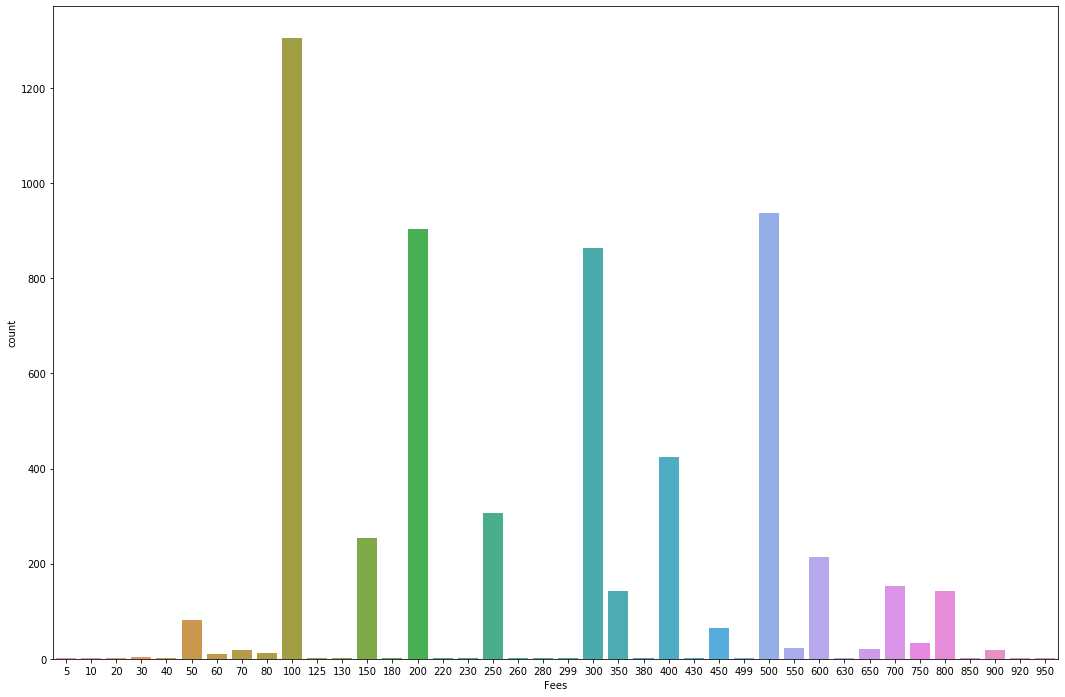

In [9]:
plt.figure(figsize=(18,12))
sns.countplot(df['Fees'])

Observations :-
    
1. More than 1200 doctors are taking 100 as their fees.
2. Few doctors are taking less than 60 as their fees.
3. 5 is the least fees taken by a doctor.
4. Mostly doctors are taking more than and equal to 350 as their fees.

# Data Visualizations

To check missing values

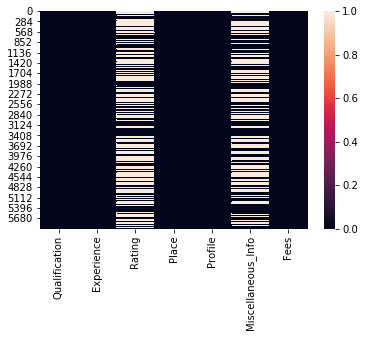

In [10]:
sns.heatmap(df.isnull())

Observations :-
    
1. Ratings and Miscellaneous_Info columns have null values.

In [12]:
df['Rating'].mode()[0]

'100%'

In [13]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])

In [14]:
df['Rating'].isnull().sum()

0

In [15]:
df['Miscellaneous_Info'].isnull().sum()

2620

In [16]:
((5961-2620)/5961)*100

56.04764301291729

In [17]:
# 56% null vales are present in 'Miscellaneous_Info' column.
# 'Miscellaneous_Info' column is not so relevant for prediction of fees.

In [18]:
# We will drop 'Miscellaneous_Info' column from dataset

In [19]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [20]:
df['Place'].mode()[0]

'HSR Layout, Bangalore'

In [21]:
df['Place']=df['Place'].fillna(df['Place'].mode()[0])

# Feature Engineering

In [22]:
# Experience
df['Experience'] = df['Experience'].str.split().str[0]
df['Experience'] 

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: object

In [23]:
df['Experience'] = df['Experience'].astype(int)

In [24]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350


In [25]:


df['locality'] = df['Place'].str.split(",").str[0]
df['city'] = df['Place'].str.split(",").str[1]

#Now we can drop the place variable
df.drop('Place',axis=1,inplace=True)

In [26]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100%,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100%,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,250,Keelkattalai,Chennai


In [27]:
df['Rating'].value_counts()

100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
92%       66
90%       66
91%       60
89%       42
88%       41
85%       27
82%       23
83%       21
86%       21
80%       19
77%       16
87%       14
79%       13
84%       13
81%       12
67%       12
71%        9
76%        9
73%        8
75%        8
60%        7
74%        7
78%        6
68%        5
56%        5
70%        4
69%        4
57%        3
72%        3
64%        2
33%        2
62%        2
63%        2
55%        2
7%         1
65%        1
40%        1
47%        1
36%        1
45%        1
53%        1
58%        1
48%        1
Name: Rating, dtype: int64

In [28]:
# extract value of rating to avoid '%' and convert to numeric
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [29]:
df['Rating'].value_counts()

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64

In [30]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai


In [31]:
print("0-9% ",len((df[(df['Rating']>0) & (df['Rating']<10)])))
print("10-19% ",len(df[(df['Rating']>=10) & (df['Rating']<20)]))
print("20-29% ",len(df[(df['Rating']>=20) & (df['Rating']<30)]))
print("30-39% ",len(df[(df['Rating']>=30) & (df['Rating']<40)]))
print("40-49% ",len(df[(df['Rating']>=40) & (df['Rating']<50)]))
print("50-59% ",len(df[(df['Rating']>=50) & (df['Rating']<60)]))
print("60-69% ",len(df[(df['Rating']>=60) & (df['Rating']<70)]))
print("70-79% ",len(df[(df['Rating']>=70) & (df['Rating']<80)]))
print("80-89% ",len(df[(df['Rating']>=80) & (df['Rating']<90)]))
print("90-99% ",len(df[(df['Rating']>=90) & (df['Rating']<100)]))
print("100-109% ",len(df[(df['Rating']>=100) & (df['Rating']<110)]))

0-9%  1
10-19%  0
20-29%  0
30-39%  3
40-49%  4
50-59%  12
60-69%  35
70-79%  83
80-89%  233
90-99%  1604
100-109%  3986


In [32]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(10)]
df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [33]:
len(bins)

11

In [34]:
len(labels)

10

In [35]:
df['Rating'].value_counts().sort_index()
# nice it is exactly being grouped.

0       1
1       0
2       0
3       4
4       3
5      19
6      32
7      98
8     280
9    5524
Name: Rating, dtype: int64

In [36]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,9,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,9,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,9,Ayurveda,250,Keelkattalai,Chennai


In [37]:
df['Qualification_count'] = df['Qualification'].apply(lambda x: len(x.split(",")))
df['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [38]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"BHMS, MD - Homeopathy",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"BAMS, MD - Ayurveda Medicine",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"BSc - Zoology, BAMS",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,BAMS,20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [39]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [40]:
# Extract relevant qualification
# DICT of qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
#print(Qualification)

In [41]:
df["Qualification"]

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object

In [42]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [43]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [44]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1


In [45]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [46]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,9,Homeopath,100,Kakkanad,Ernakulam,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,9,Ayurveda,350,Whitefield,Bangalore,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,2,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,9,Ayurveda,250,Bannerghatta Road,Bangalore,2,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,9,Ayurveda,250,Keelkattalai,Chennai,1,0,0,1,0,0,0,0,0,0,0


In [47]:
# Now we can drop the extra quali which we added 
df.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [48]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [49]:
# CITY COLUMN
df['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5', nan],
      dtype=object)

In [50]:
# remove the extra spaces before the city
import re
df['city'] = df['city'].apply(lambda x: re.sub(' +','',str(x)))

In [51]:
df['city'].value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
nan                      1
Sector5                  1
Name: city, dtype: int64

In [52]:
df[df['locality'] == 'Dwarka']  


,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
166,7,9,Dentist,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
299,8,9,Homeopath,250,Dwarka,Delhi,0,0,0,1,0,0,0,0,0,0
306,31,9,General Medicine,300,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
485,30,9,Ayurveda,200,Dwarka,Delhi,0,0,1,0,0,0,0,0,0,0
690,19,9,General Medicine,700,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,30,6,ENT Specialist,400,Dwarka,Delhi,1,0,0,0,0,1,0,0,0,0
5685,19,9,Dermatologists,400,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
5724,11,9,Dentist,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
5886,11,9,Dermatologists,600,Dwarka,Delhi,1,0,0,0,1,0,1,0,0,0


whereever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have
to correct.

In [53]:
df['city'] = np.where(df['city']=="Sector5","Delhi", df['city'])

In [54]:
# Removing nan values from city column
df['city']=df['city'].fillna(df['city'].mode()[0])

In [55]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [56]:
df.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
locality                                0
city                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

In [57]:
# let's see for each city how much locality data is there
df.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
nan                     1
Name: locality, dtype: int64

In [58]:
df.head()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [59]:
df.drop(['locality'],axis=1,inplace=True)

In [60]:
df.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,9,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,9,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,9,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,9,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,9,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


# Bivariate Analysis

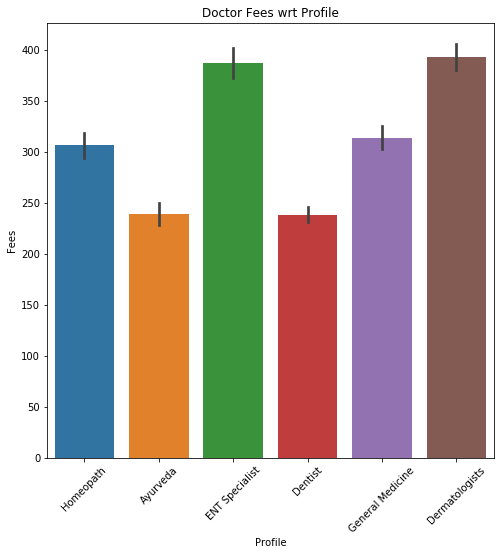

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

Observations :-
    
1. Highest Fees is taken by Dermatologists and ENT Specialist.
2. Lowest Fees is taken by Ayurveda and Dentist.
3. Doctors of Homeopath and General Medicine Profiles take almost equal fees around 300. 

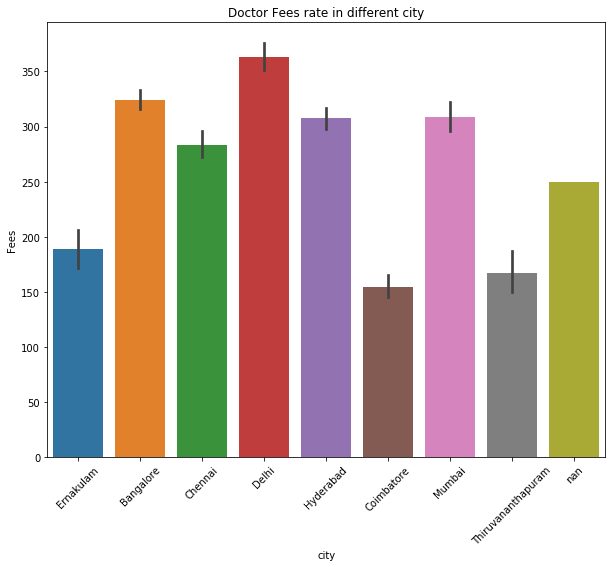

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=df)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

Observations :-
    
1. Highest fees is taken by doctors in Delhi.
2. Lowest fees is taken by doctors in Coimbatore.
3. Doctors of Hyderabad and Mumbai charges equal fees.

df.drop(['locality'],axis=1,inplace=True)

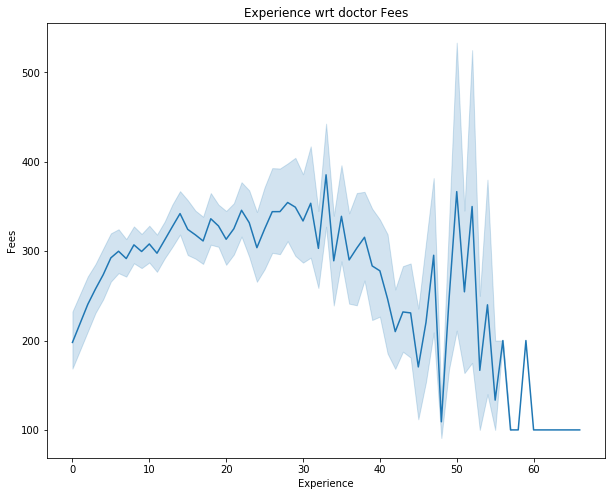

In [63]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df)
ax.set_title("Experience wrt doctor Fees")
plt.show()

Observations :-
    
1. Fees of the doctors approximately increase in the range of 0-15 years of experience.
2. Fees of the doctors approximately remains constant in the range of 15 - 35 years of experience.
3. Fees of the doctors approximately decrease in the range of 35-45 years.
4. The doctors' fees become unconstant ( sometimes it increases and sometimes it decreases ) after 45 years of experience.

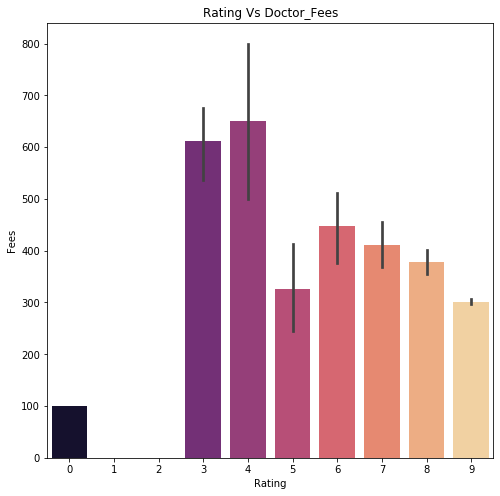

In [64]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=df,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

Observations :-
    
1. As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and
where fees are charged so high, there rating is between 30-60%.


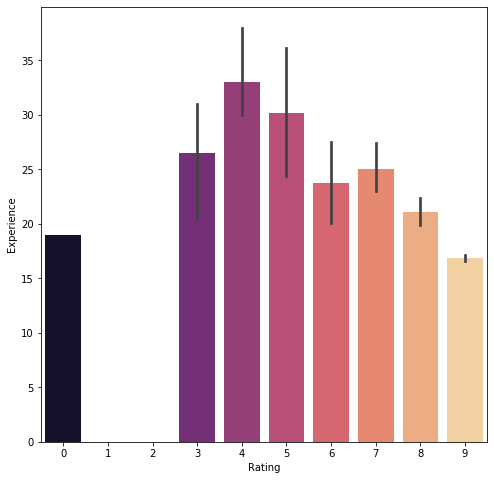

In [65]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=df,palette='magma')
plt.show()

Observations :-
1. The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median 
experience is 14 years.

# To check correlation

In [66]:
dfcor=df.corr()
dfcor

,Experience,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,0.111103,0.008510
Fees,0.002117,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
MBBS,0.271347,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871
BDS,-0.196268,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301
BAMS,-0.047150,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747
BHMS,-0.114191,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109
MD - Dermatology,-0.067704,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,-0.064618,-0.059475
MS - ENT,0.093778,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,-0.060978,0.168226,-0.048156
Venereology & Leprosy,-0.120213,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,-0.050947,-0.039713,-0.040234
MD - General Medicine,0.097549,0.040921,0.220358,-0.121943,-0.078722,-0.077760,-0.075311,-0.060978,-0.050947,1.000000,-0.046785,-0.039653


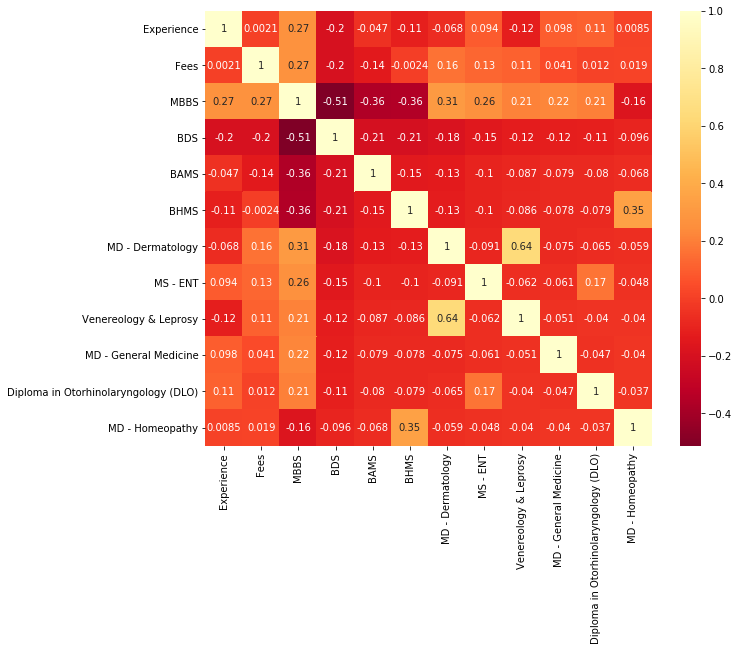

In [67]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations :-
    
1. Fees is highly positively correlated to MBBS.
2. MBBS is highly negatively correlated to BDS.
3. BDS is highly positively correlated to MD-homeopathy.
4. BDS is highly negatively correlated to fees.

# Encoding

In [68]:
df = pd.get_dummies(df,columns=['city','Profile'], prefix=['city','Profile'])

In [69]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_nan,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,9,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,9,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,9,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,9,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,9,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Plotting Outliers

Experience                                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Fees                                    AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
MBBS                                    AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
BDS                                     AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
BAMS                                       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
BHMS                                    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
MD - Dermatology                        AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
MS - ENT                                AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Venereology & Leprosy                      AxesSubplot(0.125,0.566951;0.168478x0.0920732)
MD - General Medicine                   AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Diploma in Otorhinolaryngology (DLO)    AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MD - Homeo

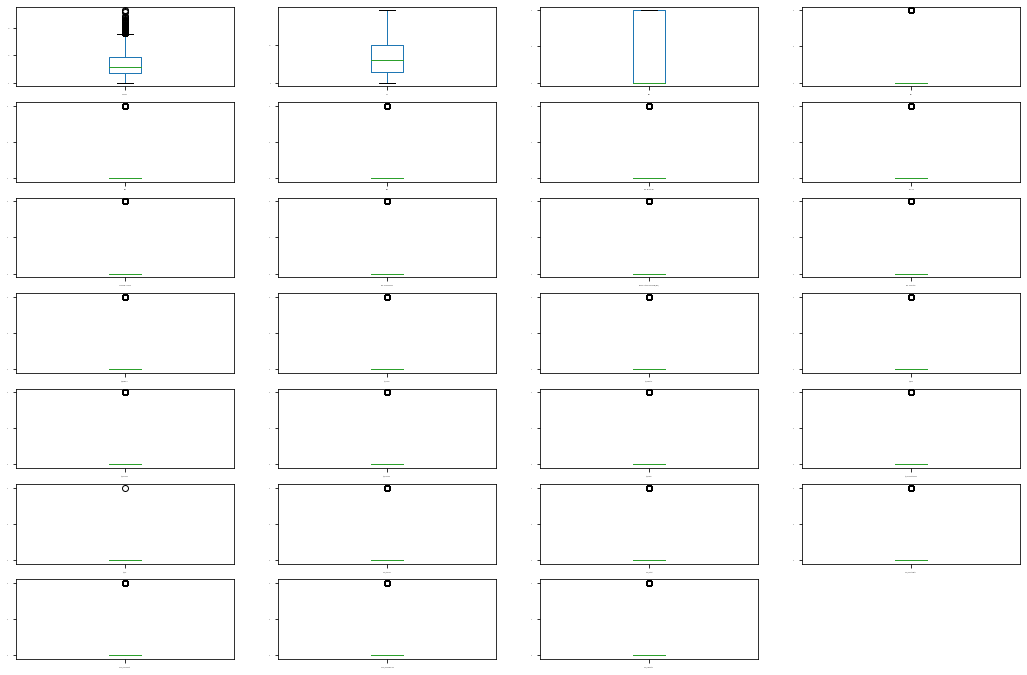

In [70]:
df.plot(kind='box',subplots=True,layout=(7,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. All columns have outliers except Fees and MBBS columns. 

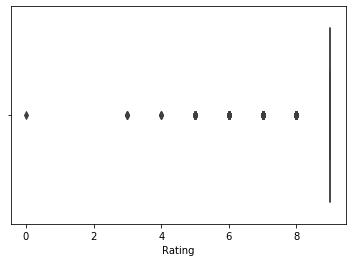

In [71]:
sns.boxplot(df['Rating'])

Observations :-
    
1. Rating column has outliers.

In [72]:
df['Rating'] = pd.Categorical(df['Rating'])

In [73]:
df['Rating']

0       9
1       9
2       9
3       9
4       9
       ..
5956    9
5957    9
5958    9
5959    8
5960    9
Name: Rating, Length: 5961, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [74]:
df['Rating'] = df['Rating'].cat.codes

In [75]:
df['Rating']

0       9
1       9
2       9
3       9
4       9
       ..
5956    9
5957    9
5958    9
5959    8
5960    9
Name: Rating, Length: 5961, dtype: int8

# Removing Outliers

In [76]:

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.60097885, 0.23410883, 1.08926083, ..., 0.3729841 , 0.49496209,
        2.46397532],
       [0.47604029, 0.23410883, 0.22029544, ..., 0.3729841 , 0.49496209,
        0.40584822],
       [0.74529508, 0.23410883, 0.04161581, ..., 2.68107941, 0.49496209,
        0.40584822],
       ...,
       [2.12675597, 0.23410883, 1.52985171, ..., 0.3729841 , 2.02035676,
        0.40584822],
       [0.20678551, 1.77095257, 1.08926083, ..., 0.3729841 , 2.02035676,
        0.40584822],
       [0.02728232, 0.23410883, 0.56543832, ..., 0.3729841 , 0.49496209,
        0.40584822]])

In [77]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [78]:
df_new.shape

(4097, 28)

In [79]:
df.shape

(5961, 28)

In [80]:
((5961-4097)/5961)*100

31.269921154168763

In [81]:
#31.26 % of data has removed using z-score method.

In [82]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
# REMOVING OUTLIERS USING IQR METHOD
df_new_o=df[~((df<(Q1==1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]

In [83]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new_o.shape)


shape before and after
shape before         : (5961, 28)
shape after          : (0, 28)


In [84]:
df.columns

Index(['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

In [85]:
df=df_new

In [86]:
df.shape

(4097, 28)

# To Check Skewness

In [87]:
df.skew()

Experience                              0.956205
Rating                                 -4.495202
Fees                                    0.727408
MBBS                                    0.558197
BDS                                     1.039569
BAMS                                    1.689173
BHMS                                    2.042803
MD - Dermatology                        3.334022
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
city_Bangalore                          1.259772
city_Chennai                            1.954556
city_Coimbatore                         0.000000
city_Delhi                              1.436061
city_Ernakulam                          0.000000
city_Hyderabad                          1.740490
city_Mumbai                             1.246934
city_Thiruvananthapu

In [88]:
df_list=['Experience',    'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'city_Bangalore', 'city_Chennai', 
       'city_Delhi',  'city_Hyderabad', 'city_Mumbai',
       'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']
for val in df_list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [89]:
df.skew()

Experience                              0.037297
Rating                                 -4.495202
Fees                                    0.727408
MBBS                                    0.558197
BDS                                     1.039569
BAMS                                    1.689173
BHMS                                    2.042803
MD - Dermatology                        3.334022
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
city_Bangalore                          1.259772
city_Chennai                            1.954556
city_Coimbatore                         0.000000
city_Delhi                              1.436061
city_Ernakulam                          0.000000
city_Hyderabad                          1.740490
city_Mumbai                             1.246934
city_Thiruvananthapu

In [90]:
df.columns

Index(['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

# Train Test Split

In [91]:
x=df[['Experience', 'Rating', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']]

y=df['Fees']

# Scaling of Data

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [93]:
x=pd.DataFrame(x)

In [94]:
x.columns=['Experience', 'Rating',  'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'city_Bangalore', 'city_Chennai', 'city_Coimbatore',
       'city_Delhi', 'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'city_nan', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']

# Algorithms

In [95]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.1294114467971056
error:
Mean absolute error: 135.92934935143558
Mean squared error: 28719.713571789194
Root Mean squared error: 169.4689162406758
0.11057313550789483
error:
Mean absolute error: 132.14797663935616
Mean squared error: 26854.691620569556
Root Mean squared error: 163.87401142514807
0.11894219857253874
error:
Mean absolute error: 138.0451238418349
Mean squared error: 29129.248586753733
Root Mean squared error: 170.67292868745685
0.08167132843977254
error:
Mean absolute error: 134.87472752938652
Mean squared error: 28658.619654633814
Root Mean squared error: 169.28856917888407
0.12219801694379184
error:
Mean absolute error: 136.59626028359185
Mean squared error: 29468.439481214657
Root Mean squared error: 171.66373956434322
0.10846264946314965
error:
Mean absolute error: 134.39477233723474
Mean squared error: 27972.231363667484
Root Mean squared error: 167.2490100528774
0.09726438597543408
error:
Mean absolute error: 135.64674892906518
Mean squared error: 28526.25456030234

In [96]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [97]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=79)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print(lm, score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

LinearRegression() 0.7910442339027511
error:
Mean absolute error: 135.40472062010784
Mean squared error: 27465.886796936607
Root Mean squared error: 165.72835242328514


In [99]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print(lm, score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


LinearRegression() 0.736724791011258
error:
Mean absolute error: 146.76277427141005
Mean squared error: 38047.56269036028
Root Mean squared error: 195.05784447276218


In [100]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
print(lm, score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))


LinearRegression() 0.7789139572532884
error:
Mean absolute error: 138.41685144124168
Mean squared error: 30826.076807095345
Root Mean squared error: 175.57356522863955


In [101]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
print(lm, score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


LinearRegression() 0.800720856159752
error:
Mean absolute error: 136.9218605151042
Mean squared error: 30172.092914447578
Root Mean squared error: 173.70115979591955


In [102]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [103]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
print(lm, score(y_test,predls))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predls))
print('Mean squared error:',mean_squared_error(y_test,predls))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predls)))

LinearRegression() 0.7910441663985767
error:
Mean absolute error: 135.4047196172083
Mean squared error: 27465.879659104554
Root Mean squared error: 165.72833088854952


In [104]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
print(lm, score(y_test,predel))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


LinearRegression() 0.7910438166521276
error:
Mean absolute error: 135.40472062010784
Mean squared error: 27465.886796936607
Root Mean squared error: 165.72835242328514


In [105]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(lm, score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


LinearRegression() 0.7754712250753134
error:
Mean absolute error: 140.15508752065023
Mean squared error: 32376.58099938966
Root Mean squared error: 179.93493546109843


In [106]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(lm, score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
print('Mean squared error:',mean_squared_error(y_test,predad))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))



LinearRegression() 0.7643870796940295
error:
Mean absolute error: 143.00809408432653
Mean squared error: 29107.511715129694
Root Mean squared error: 170.60923689862074


Support Vector Regressor is the best algorithm.

# Cross - Validation Scores

In [107]:
from sklearn.model_selection import cross_val_score
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.05323824 0.03473653 0.07383077 0.02192753 0.0642827 ]
0.04960315334775665 0.018987558261094908


In [108]:
list1=[0.800720856159752]
list2=[0.04960315334775665]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.7511177028119953]


As the difference between accuracy score and cross validation score of Support Vector Regressor is only 7 %. So, It is 
verified that Support Vector Regressor is the best algorithm for this model with accuracy of 80.072 % . 

# Hyper Parameter Tuning

In [109]:
svm=SVR()
grid_param={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],'kernel' : ['linear', 'poly', 'rbf']}
gd_sr=GridSearchCV(estimator=svm,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [110]:
gd_sr.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [111]:
svm=SVR(C= 0.1, gamma = 'scale', kernel= 'linear')
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
print(svm, score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


SVR(C=0.1, kernel='linear') 0.8100073629418246
error:
Mean absolute error: 130.67381141026965
Mean squared error: 28228.45994837503
Root Mean squared error: 168.01327313154468


Accuracy of Support Vector Regressor has changed from 80.072 % to 81.000 % with hyper parameter tuning.

In [113]:
df_1=pd.read_csv("Doctor_Test.csv")

In [114]:
df_1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


To check missing values

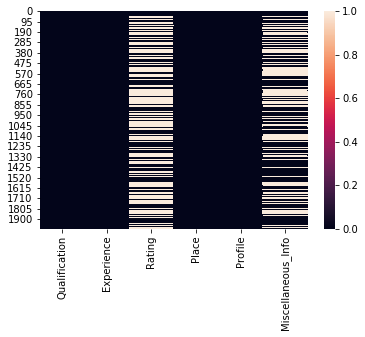

In [115]:
sns.heatmap(df_1.isnull())

Observations :-
    
1. Ratings and Miscellaneous_Info columns have null values.

In [116]:
df_1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [117]:
df_1['Rating'].mode()[0]

'100%'

In [118]:
df_1['Rating']=df_1['Rating'].fillna(df_1['Rating'].mode()[0])

In [119]:
df_1['Rating'].isnull().sum()

0

In [120]:
df_1['Place'].mode()[0]

'Andheri West, Mumbai'

In [121]:
df_1['Place']=df_1['Place'].fillna(df_1['Place'].mode()[0])

In [122]:
df_1['Miscellaneous_Info'].mode()[0]

'Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth'

In [123]:
df_1['Miscellaneous_Info']=df_1['Miscellaneous_Info'].fillna(df_1['Miscellaneous_Info'].mode()[0])

In [124]:
df_1.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

# Feature Engineering

In [125]:
# Experience
df_1['Experience'] = df_1['Experience'].str.split().str[0]
df_1['Experience'] 

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: object

In [126]:
df_1['Experience'] = df_1['Experience'].astype(int)

In [127]:
df_1.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,100%,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100%,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...


In [128]:

df_1['locality'] = df_1['Place'].str.split(",").str[0]
df_1['city'] = df_1['Place'].str.split(",").str[1]

#Now we can drop the place variable
df_1.drop('Place',axis=1,inplace=True)

In [129]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,100%,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100%,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,100%,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [130]:
df_1['Rating'].value_counts()

100%    1313
98%      112
97%       84
99%       68
96%       65
94%       51
95%       47
93%       34
92%       29
90%       29
91%       26
88%       13
87%       11
83%       11
89%       11
82%        9
85%        8
71%        7
84%        7
80%        7
86%        6
73%        5
67%        5
76%        4
70%        4
60%        4
81%        3
55%        3
64%        2
79%        2
69%        2
52%        1
65%        1
78%        1
77%        1
53%        1
Name: Rating, dtype: int64

In [131]:
# extract value of rating to avoid '%' and convert to numeric
df_1['Rating'] = df_1['Rating'].str.slice(stop=-1).astype(int)

In [132]:
df_1['Rating'].value_counts()

100    1313
98      112
97       84
99       68
96       65
94       51
95       47
93       34
92       29
90       29
91       26
88       13
83       11
89       11
87       11
82        9
85        8
84        7
80        7
71        7
86        6
73        5
67        5
76        4
70        4
60        4
81        3
55        3
79        2
69        2
64        2
78        1
77        1
65        1
53        1
52        1
Name: Rating, dtype: int64

In [133]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,100,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,100,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [134]:
print("0-9% ",len((df_1[(df_1['Rating']>0) & (df_1['Rating']<10)])))
print("10-19% ",len(df_1[(df_1['Rating']>=10) & (df_1['Rating']<20)]))
print("20-29% ",len(df_1[(df_1['Rating']>=20) & (df_1['Rating']<30)]))
print("30-39% ",len(df_1[(df_1['Rating']>=30) & (df_1['Rating']<40)]))
print("40-49% ",len(df_1[(df_1['Rating']>=40) & (df_1['Rating']<50)]))
print("50-59% ",len(df_1[(df_1['Rating']>=50) & (df_1['Rating']<60)]))
print("60-69% ",len(df_1[(df_1['Rating']>=60) & (df_1['Rating']<70)]))
print("70-79% ",len(df_1[(df_1['Rating']>=70) & (df_1['Rating']<80)]))
print("80-89% ",len(df_1[(df_1['Rating']>=80) & (df_1['Rating']<90)]))
print("90-99% ",len(df_1[(df_1['Rating']>=90) & (df_1['Rating']<100)]))
print("100-109% ",len(df_1[(df_1['Rating']>=100) & (df_1['Rating']<110)]))

0-9%  0
10-19%  0
20-29%  0
30-39%  0
40-49%  0
50-59%  5
60-69%  14
70-79%  24
80-89%  86
90-99%  545
100-109%  1313


In [135]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(10)]
df_1['Rating'] = pd.cut(df_1['Rating'], bins=bins, labels=labels, include_lowest=True)

In [136]:
len(bins)

11

In [137]:
len(labels)

10

In [138]:
df_1['Rating'].value_counts().sort_index()
# nice it is exactly being grouped.

0       0
1       0
2       0
3       0
4       0
5       9
6      14
7      27
8     108
9    1829
Name: Rating, dtype: int64

In [139]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [140]:
df_1['Qualification_count'] = df_1['Qualification'].apply(lambda x: len(x.split(",")))
df_1['Qualification_count'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_count, dtype: int64

In [141]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city,Qualification_count
0,MBBS,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,2
2,"MBBS, DDVL",40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,2
3,BAMS,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,2


In [142]:
df_1['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [143]:
# Extract relevant qualification
# DICT of qualification with there counts
df_1["Qualification"]=df_1["Qualification"].str.split(",")
Qualification ={}
for x in df_1["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
#print(Qualification)

In [144]:
df_1["Qualification"]

0                                                  [MBBS]
1           [MBBS,  Diploma in Otorhinolaryngology (DLO)]
2                                           [MBBS,  DDVL]
3                                                  [BAMS]
4       [BDS,  MDS - Conservative Dentistry & Endodont...
                              ...                        
1982                          [BAMS,  Doctor of Medicine]
1983    [MD - Dermatology ,  Venereology & Leprosy,  M...
1984          [MBBS,  MD / MS - Obstetrics & Gynaecology]
1985                                                [BDS]
1986    [MBBS,  MD - Dermatology ,  Venereology & Lepr...
Name: Qualification, Length: 1987, dtype: object

In [145]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city,Qualification_count
0,[MBBS],35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,2
2,"[MBBS, DDVL]",40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,2
3,[BAMS],0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,1
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,2


In [146]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [147]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city,Qualification_count
0,[MBBS],35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,2
2,"[MBBS, DDVL]",40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,2
3,[BAMS],0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,1
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,2


In [148]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df_1[qual] = 0

for x,y in zip(df_1['Qualification'].values, np.array([i for i in range(len(df_1))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_1[c][y] = 1

In [149]:
df_1.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city,Qualification_count,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,2,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,2,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,1,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,2,0,1,0,0,0,0,0,0,0,0


In [150]:
# Now we can drop the extra quali which we added 
df_1.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [151]:
df_1.head()

,Experience,Rating,Profile,Miscellaneous_Info,locality,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,1
3,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0


In [152]:
# CITY COLUMN
df_1['city'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam'], dtype=object)

In [153]:
# remove the extra spaces before the city
import re
df_1['city'] = df_1['city'].apply(lambda x: re.sub(' +','',str(x)))

In [154]:
df_1['city'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                395
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: city, dtype: int64

In [155]:
df_1.head()

,Experience,Rating,Profile,Miscellaneous_Info,locality,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,1
3,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0


In [156]:
df_1.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Miscellaneous_Info                      0
locality                                0
city                                    0
MBBS                                    0
BDS                                     0
BHMS                                    0
BAMS                                    0
MD - Dermatology                        0
MS - ENT                                0
MD - General Medicine                   0
Venereology & Leprosy                   0
Diploma in Otorhinolaryngology (DLO)    0
DDVL                                    0
dtype: int64

In [157]:
# let's see for each city how much locality data is there
df_1.groupby('city')['locality'].nunique()

city
Bangalore             119
Chennai                93
Coimbatore             27
Delhi                 132
Ernakulam              27
Hyderabad              94
Mumbai                 85
Thiruvananthapuram     15
Name: locality, dtype: int64

In [158]:
df_1.head()

,Experience,Rating,Profile,Miscellaneous_Info,locality,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,1
3,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,New Ashok Nagar,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0


In [159]:
df_1.drop(['locality'],axis=1,inplace=True)

In [160]:
df_1.head()

,Experience,Rating,Profile,Miscellaneous_Info,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,9,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,Mumbai,1,0,0,0,0,0,0,0,0,0
1,31,9,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,40,6,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,1,0,0,0,0,0,0,0,0,1
3,0,9,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,Delhi,0,0,0,1,0,0,0,0,0,0
4,16,9,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,0,1,0,0,0,0,0,0,0,0


# Dropping Columns

In [161]:
df_1.drop('Miscellaneous_Info',axis=1,inplace=True)

# Encoding

In [162]:
df_1 = pd.get_dummies(df_1,columns=['city','Profile'], prefix=['city','Profile'])

In [163]:
df_1.head()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,...,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,9,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,31,9,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,40,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,9,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Plotting Outliers

Experience                                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
MBBS                                    AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
BDS                                     AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
BHMS                                    AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
BAMS                                       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
MD - Dermatology                        AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
MS - ENT                                AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
MD - General Medicine                   AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Venereology & Leprosy                      AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Diploma in Otorhinolaryngology (DLO)    AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
DDVL                                    AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
city_Banga

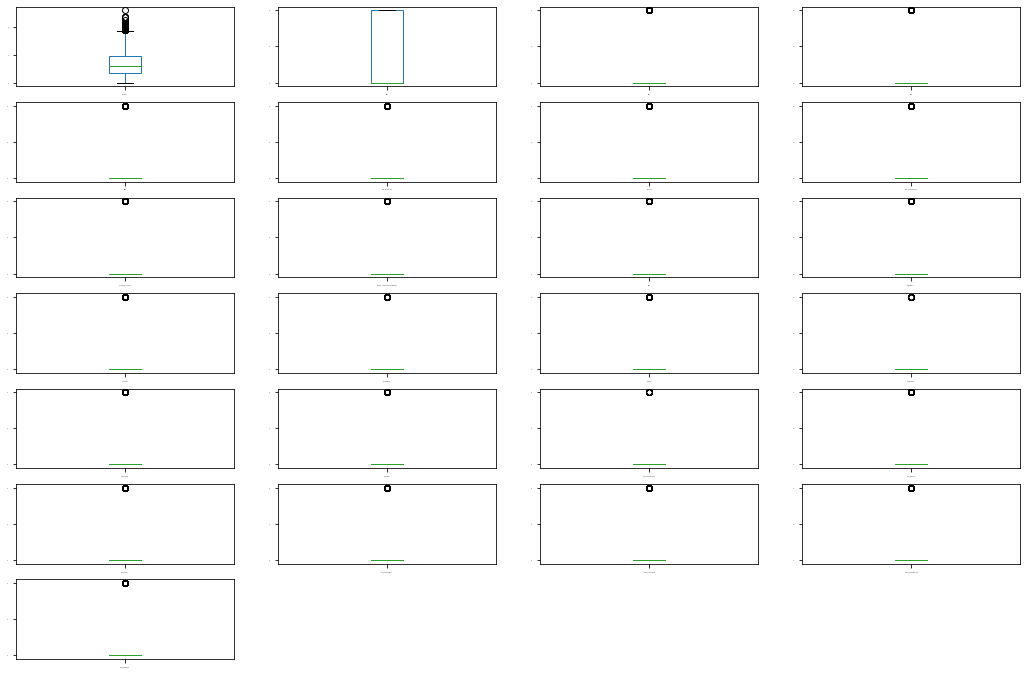

In [164]:
df_1.plot(kind='box',subplots=True,layout=(7,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. All columns have outliers except MBBS columns.

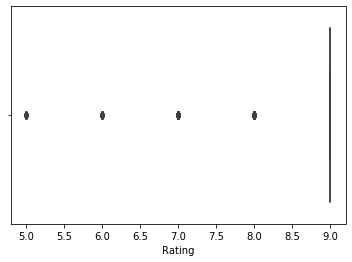

In [165]:
sns.boxplot(df_1['Rating'])

Observations :-
    
1. Rating column has outliers.

In [166]:
df_1['Rating'] = pd.Categorical(df_1['Rating'])

In [167]:
df_1['Rating']

0       9
1       9
2       6
3       9
4       9
       ..
1982    9
1983    9
1984    9
1985    9
1986    9
Name: Rating, Length: 1987, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [168]:
df_1['Rating'] = df_1['Rating'].cat.codes

In [169]:
df_1['Rating']

0       9
1       9
2       6
3       9
4       9
       ..
1982    9
1983    9
1984    9
1985    9
1986    9
Name: Rating, Length: 1987, dtype: int8

# Removing Outliers

In [170]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))
z

array([[1.50699229, 0.25185392, 1.01470294, ..., 0.36624093, 1.8641956 ,
        0.40247771],
       [1.15500055, 0.25185392, 1.01470294, ..., 2.73044303, 0.5364244 ,
        0.40247771],
       [1.94698195, 6.00356772, 1.01470294, ..., 0.36624093, 0.5364244 ,
        0.40247771],
       ...,
       [0.78095398, 0.25185392, 1.01470294, ..., 0.36624093, 1.8641956 ,
        0.40247771],
       [0.51696018, 0.25185392, 0.9855101 , ..., 0.36624093, 0.5364244 ,
        0.40247771],
       [0.86895191, 0.25185392, 1.01470294, ..., 0.36624093, 0.5364244 ,
        0.40247771]])

In [171]:
threshold=3
df_new=df_1[(z<3).all(axis=1)]

In [172]:
df_new.shape

(1291, 26)

In [173]:
df_1.shape

(1987, 26)

In [174]:
((1987-1291)/1987)*100

35.0276799194766

In [175]:
#35.02 % of data has removed using z-score method.

In [176]:
df_1=df_new

In [177]:
df_1.columns

Index(['Experience', 'Rating', 'MBBS', 'BDS', 'BHMS', 'BAMS',
       'MD - Dermatology', 'MS - ENT', 'MD - General Medicine',
       'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL',
       'city_Bangalore', 'city_Chennai', 'city_Coimbatore', 'city_Delhi',
       'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

# To Check Skewness

In [178]:
df_1.skew()

Experience                              0.907758
Rating                                 -4.582559
MBBS                                    0.792297
BDS                                     1.009088
BHMS                                    1.663559
BAMS                                    1.649994
MD - Dermatology                        0.000000
MS - ENT                                0.000000
MD - General Medicine                   0.000000
Venereology & Leprosy                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
DDVL                                    0.000000
city_Bangalore                          1.348090
city_Chennai                            2.131786
city_Coimbatore                         0.000000
city_Delhi                              1.258520
city_Ernakulam                          0.000000
city_Hyderabad                          1.822518
city_Mumbai                             1.178898
city_Thiruvananthapuram                 0.000000
Profile_Ayurveda    

In [179]:
df_1_list=['Experience', 'MBBS',   'BDS', 'BAMS', 'BHMS',
        'city_Bangalore', 'city_Chennai', 
       'city_Delhi',  'city_Hyderabad', 'city_Mumbai',
       'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']
for val in df_1_list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [180]:
df_1.skew()

Experience                              0.004546
Rating                                 -4.582559
MBBS                                    0.792297
BDS                                     1.009088
BHMS                                    1.663559
BAMS                                    1.649994
MD - Dermatology                        0.000000
MS - ENT                                0.000000
MD - General Medicine                   0.000000
Venereology & Leprosy                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
DDVL                                    0.000000
city_Bangalore                          1.348090
city_Chennai                            2.131786
city_Coimbatore                         0.000000
city_Delhi                              1.258520
city_Ernakulam                          0.000000
city_Hyderabad                          1.822518
city_Mumbai                             1.178898
city_Thiruvananthapuram                 0.000000
Profile_Ayurveda    

In [181]:
df_1_list=[ 'MBBS',   'BDS', 'BAMS', 'BHMS',
        'city_Bangalore', 'city_Chennai', 
       'city_Delhi',  'city_Hyderabad', 'city_Mumbai',
       'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']
for val in df_1_list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [182]:
df_1.columns

Index(['Experience', 'Rating', 'MBBS', 'BDS', 'BHMS', 'BAMS',
       'MD - Dermatology', 'MS - ENT', 'MD - General Medicine',
       'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL',
       'city_Bangalore', 'city_Chennai', 'city_Coimbatore', 'city_Delhi',
       'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

In [183]:
df_1.skew()

Experience                              0.004546
Rating                                 -4.582559
MBBS                                    0.792297
BDS                                     1.009088
BHMS                                    1.663559
BAMS                                    1.649994
MD - Dermatology                        0.000000
MS - ENT                                0.000000
MD - General Medicine                   0.000000
Venereology & Leprosy                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
DDVL                                    0.000000
city_Bangalore                          1.348090
city_Chennai                            2.131786
city_Coimbatore                         0.000000
city_Delhi                              1.258520
city_Ernakulam                          0.000000
city_Hyderabad                          1.822518
city_Mumbai                             1.178898
city_Thiruvananthapuram                 0.000000
Profile_Ayurveda    

# Scaling of Data

In [184]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df_1)

In [185]:
df_1=pd.DataFrame(df_1)

In [186]:
df_1.columns=['Experience', 'Rating', 'MBBS', 'BDS', 'BHMS', 'BAMS',
       'MD - Dermatology', 'MS - ENT', 'MD - General Medicine',
       'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL',
       'city_Bangalore', 'city_Chennai', 'city_Coimbatore', 'city_Delhi',
       'city_Ernakulam', 'city_Hyderabad', 'city_Mumbai',
       'city_Thiruvananthapuram', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath']

In [187]:
df_1.shape

(1291, 26)

In [188]:
df.shape

(4097, 28)

In [189]:
svm=SVR(C= 0.1, gamma = 'scale', kernel= 'linear')
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
print(svm, score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


SVR(C=0.1, kernel='linear') 0.8100073629418246
error:
Mean absolute error: 130.67381141026965
Mean squared error: 28228.45994837503
Root Mean squared error: 168.01327313154468


# Saving the model

In [190]:
import joblib
joblib.dump(svm,"svm_doctor_fees.obj")

['svm_doctor_fees.obj']

# Making Predictions

In [191]:
a=joblib.load("svm_doctor_fees.obj")

In [192]:
pred

array([351.98923701, 262.87984576, 362.33539082, 296.79021829,
       320.52616468, 428.83458314, 292.46450176, 290.55518408,
       261.34005679, 331.62524987, 292.12455209, 314.91325483,
       335.46958055, 243.43866085, 259.77068878, 289.29697433,
       393.62668214, 388.11583691, 259.4050384 , 368.8097935 ,
       469.47521397, 331.62524987, 390.74062244, 270.11157672,
       284.1673281 , 318.55982127, 388.83429575, 241.25275159,
       255.72590831, 258.62883461, 257.31728687, 303.12857602,
       289.16753106, 333.2104454 , 242.8221196 , 264.8500462 ,
       281.35841568, 292.4876032 , 228.29465083, 238.3503459 ,
       279.0131375 , 301.89420525, 255.94122933, 260.12349723,
       302.52766627, 320.98031404, 280.25995097, 302.06240698,
       418.69657912, 247.09879418, 257.86863595, 301.03764261,
       291.68859159, 257.31728687, 241.11057275, 469.78684131,
       464.30284667, 331.62524987, 244.8567727 , 253.51798849,
       244.8567727 , 289.29697433, 372.59557659, 249.12

In [193]:
df_2=pd.DataFrame(pred)
df_2.to_csv('doctor_fees_submission_final.csv')